This is the map of Zika disease outbreaks in the US.


/Users/adityamittal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:79: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


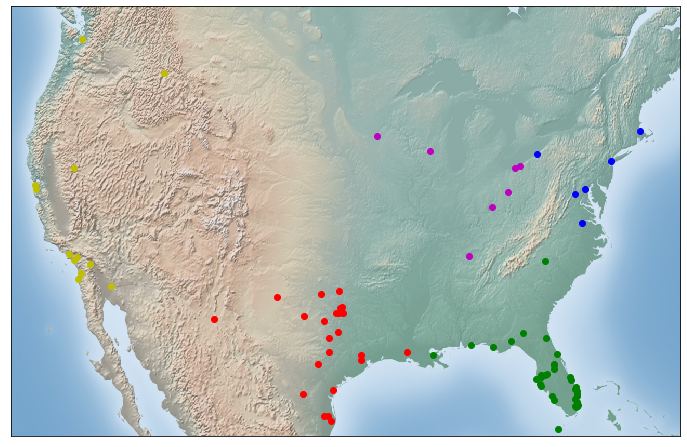

This is the map of Zika disease outbreaks in the world.


/Users/adityamittal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:81: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


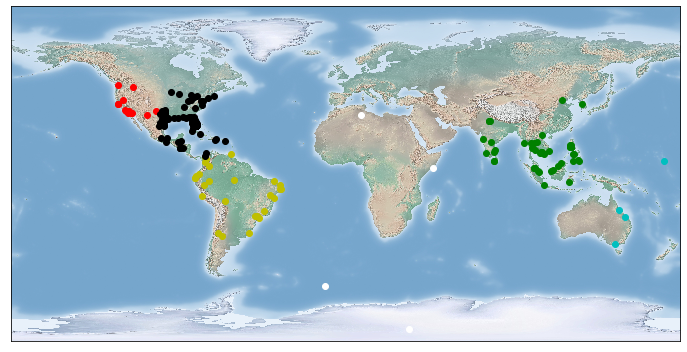

This is the map of Hepatitis disease outbreaks in the US.


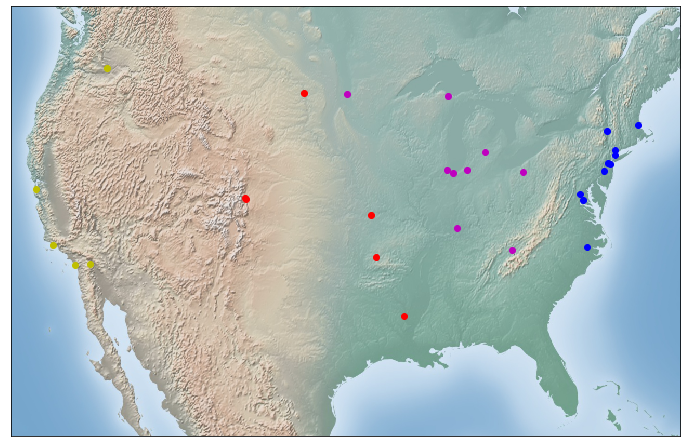

This is the map of Hepatitis disease outbreaks in the world.


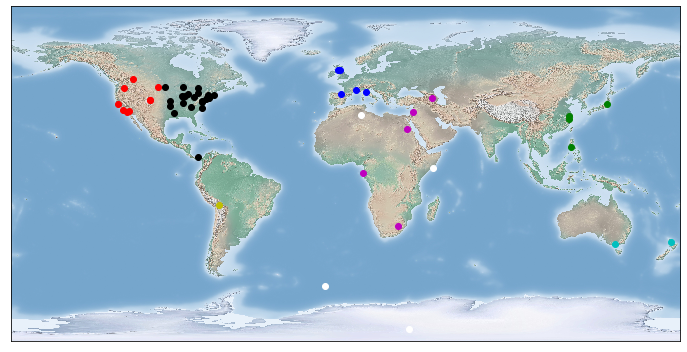

In [18]:
#Libraries
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from math import radians, cos, sin, sqrt, asin
import collections

#Reading in Dataframe
df = pd.read_csv("latitude_longitude.csv")
del df["Unnamed: 0"]

#Initializing and Adding to New Dictionaries
df_us = {'headline':[], 'cities':[], 'latitude':[], 'longitude':[], 'countrycode':[]}
df_other = {'headline':[], 'cities':[], 'latitude':[], 'longitude':[], 'countrycode':[]}
df_world = df
df_no_us = {'latitude':[], 'longitude':[]}
df_no_other = {'latitude':[], 'longitude':[]}
df_no_world = {'latitude':[], 'longitude':[]}

for index in df.index:
    if (df['countrycode'][index] == "US"):
        for column in list(df.columns):
            df_us[column].append(df[column][index])
        for column in ['latitude', 'longitude']:
            df_no_us[column].append(df[column][index])
    else:
        for column in list(df.columns):
            df_other[column].append(df[column][index])
        for column in ['latitude', 'longitude']:
            df_no_other[column].append(df[column][index])
    for column in ['latitude', 'longitude']:
        df_no_world[column].append(df[column][index])
            
#Converting from Dictionary to Dataframe
df_us = pd.DataFrame(data = df_us)
df_other = pd.DataFrame(data = df_other)
df_no_us = pd.DataFrame(data = df_no_us)
df_no_other = pd.DataFrame(data = df_no_other)
df_no_world = pd.DataFrame(data = df_no_world)

#Removing Missing Values
df_other = df_other.dropna(subset = ["countrycode"])
df_world = df_world.dropna(subset = ["countrycode"])
df_no_other = df_no_other.dropna(thresh = 1)
df_no_world = df_no_world.dropna(thresh = 1)

#Elbow Curve
def elbow_curve(df1):
    clusters = range(1, 20)
    kmeans_elbow = [KMeans(n_clusters=i) for i in clusters]
    score = [kmeans_elbow[i].fit(df1).score(df1) for i in range(len(kmeans_elbow))]
    plt.plot(clusters, score)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Score')
    plt.title('Elbow Curve')
    plt.show()

#K-Means Algorithm
def run_k_means(df1, num_cluster, printGraph):
    #Adding to Dataframe
    clusters = range(1, 20)
    kmeans_elbow = [KMeans(n_clusters=i) for i in clusters]
    df1["cluster_label"] = kmeans_elbow[num_cluster-1].fit(df1).labels_

    if (printGraph):
        kmeans = KMeans(n_clusters=num_cluster).fit(df1)
        centroids = kmeans.cluster_centers_

        plt.scatter(df1['latitude'], df1['longitude'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
        plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
        plt.show()

#Plotting K-Means Clustering on BaseMap
def print_k_means(df1, num_cluster, typeof, center, path):
    if (typeof == "US"):
        map_plotter = Basemap(projection='lcc', lon_0=-95, llcrnrlon=-119, llcrnrlat=22, urcrnrlon=-64, urcrnrlat=49, lat_1=33, lat_2=45)
    else:
        map_plotter = Basemap()
    fig = plt.figure(figsize = (12,8))
    coordinates = []
    for index in df1.index:
        coordinates.append([df1['latitude'][index], df1['longitude'][index], df1['cluster_label'][index]])
    
    cluster_vals = {}
    for i in range(num_cluster+1):
        cluster_vals[str(i)+"_long"] = []
        cluster_vals[str(i)+"_lat"] = []
    
    for index in df1.index:
        cluster_vals[str(df1['cluster_label'][index])+'_long'].append(df1['longitude'][index])
        cluster_vals[str(df1['cluster_label'][index])+'_lat'].append(df1['latitude'][index])
    for index in range(len(center)):
        cluster_vals[str(num_cluster)+'_long'].append(center[index][0])
        cluster_vals[str(num_cluster)+'_lat'].append(center[index][1])
        
    num_list = [i for i in range(num_cluster+1)]
    color_list = ['r', 'g', 'b', 'y', 'm', 'c', 'k', 'w']
    colors = [color_list[i] for i in range(num_cluster+1)]

    for target,color in zip(num_list, colors):
         map_plotter.scatter(cluster_vals[str(target)+'_long'], cluster_vals[str(target)+'_lat'], latlon=True, c = color)
         map_plotter.shadedrelief()
    plt.show()
    fig.savefig(path)

#Implementation on Dataframes
us_clusters = 5
run_k_means(df_no_us, us_clusters, False)
# print_k_means(df_no_us, 5)

world_clusters = 7
run_k_means(df_no_world, world_clusters, False)
# print_k_means(df_no_world, 7)

#print(df_no_us)
#print(df_no_world)

#Computes Number of Headlines For Each K-Means Cluster
headline_count_us = {}
headline_count_world = {}
for i in range(us_clusters):
    sum1 = 0;
    for index in df_no_us.index:
        if (df_no_us['cluster_label'][index] == i):
            sum1 += 1
    headline_count_us[str('Cluster' + str(i))] = sum1
for i in range(world_clusters):
    sum1 = 0;
    for index in df_no_world.index:
        if (df_no_world['cluster_label'][index] == i):
            sum1 += 1
    headline_count_world[str('Cluster' + str(i))] = sum1
    
#Sorts the Data in Ascending Order
headline_count_us = sorted(headline_count_us, key=lambda x : headline_count_us[x]) 
headline_count_world = sorted(headline_count_world, key=lambda x : headline_count_world[x]) 

#Splitting up Main Dataframe into Seperate Dataframes by Clusters
df_list_us = []
df_list_world = []
for i in range(us_clusters):
    df_list_us.append({'Latitude':[], 'Longitude':[], 'cluster_label':[], 'headline':[]})
for i in range(world_clusters):
    df_list_world.append({'Latitude':[], 'Longitude':[], 'cluster_label':[], 'headline':[]})

for index in df_no_us.index:
    df_list_us[df_no_us['cluster_label'][index]]['Latitude'].append(df_no_us['latitude'][index])
    df_list_us[df_no_us['cluster_label'][index]]['Longitude'].append(df_no_us['longitude'][index])
    df_list_us[df_no_us['cluster_label'][index]]['cluster_label'].append(df_no_us['cluster_label'][index])
    df_list_us[df_no_us['cluster_label'][index]]['headline'].append(df_us['headline'][index])

for index in df_no_world.index:
    df_list_world[df_no_world['cluster_label'][index]]['Latitude'].append(df_no_world['latitude'][index])
    df_list_world[df_no_world['cluster_label'][index]]['Longitude'].append(df_no_world['longitude'][index])
    df_list_world[df_no_world['cluster_label'][index]]['cluster_label'].append(df_no_world['cluster_label'][index])
    df_list_world[df_no_world['cluster_label'][index]]['headline'].append(df_world['headline'][index])

df_no_us = pd.DataFrame(columns = ['Latitude', 'Longitude', 'cluster_label', 'headline'])
df_no_world = pd.DataFrame(columns = ['Latitude', 'Longitude', 'cluster_label', 'headline'])
for cluster in headline_count_us:
    val = int(cluster[-1])
    df_no_us = df_no_us.append(pd.DataFrame(data = df_list_us[val]), ignore_index = True)
for cluster in headline_count_world:
    val = int(cluster[-1])
    df_no_world = df_no_world.append(pd.DataFrame(data = df_list_world[val]), ignore_index = True)

#Finding Geographic Center For Each K-Means Cluster
df_center_us = []
df_center_world = []
for index in range(us_clusters):
    avg_latitude = sum(df_list_us[index]['Latitude'])/len(df_list_us[index]['Latitude'])
    avg_longitude = sum(df_list_us[index]['Longitude'])/len(df_list_us[index]['Longitude'])
    df_center_us.append([avg_latitude, avg_longitude])
for index in range(world_clusters):
    avg_latitude = sum(df_list_world[index]['Latitude'])/len(df_list_world[index]['Latitude'])
    avg_longitude = sum(df_list_world[index]['Longitude'])/len(df_list_world[index]['Longitude'])
    df_center_world.append([avg_latitude, avg_longitude])

    
#Adds Distance from Geographic Center for Each Data Point
def haversine(point_a, point_b):
    lon1, lat1 = point_a[0], point_a[1]
    lon2, lat2 = point_b[0], point_b[1]
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371
    return c * r

for ind in range(len(df_list_us)):
    index = df_list_us[ind]
    distances_from = []
    for i in range(len(index['Latitude'])):
        distances_from.append(haversine(df_center_us[ind], [index['Latitude'][i], index['Longitude'][i]]))
    df_list_us[ind]['distance_center'] = distances_from
for ind in range(len(df_list_world)):
    index = df_list_world[ind]
    distances_from = []
    for i in range(len(index['Latitude'])):
        distances_from.append(haversine(df_center_world[ind], [index['Latitude'][i], index['Longitude'][i]]))
    df_list_world[ind]['distance_center'] = distances_from

#Converts Dictionaries into Dataframes
df_list_us_convert = []
df_list_world_convert = []
for ind in df_list_us:
    df_list_us_convert.append(pd.DataFrame.from_dict(ind))
for ind in df_list_world:
    df_list_world_convert.append(pd.DataFrame.from_dict(ind))

#Sorts Dataframes by the Distance from the Center
for ind in range(len(df_list_us_convert)):
    df_list_us_convert[ind] = df_list_us_convert[ind].sort_values(by = 'distance_center')
for ind in range(len(df_list_world_convert)):
    df_list_world_convert[ind] = df_list_world_convert[ind].sort_values(by = 'distance_center')

#Selects Only the Headlines From the Data to Analyze
world_headlines_sorted = []
us_headlines_sorted = []
for ind in df_list_us_convert:
    us_headlines_sorted.append(ind['headline'])
for ind in df_list_world_convert:
    world_headlines_sorted.append(ind['headline'])

def search_dataframe(df, word):
    new_df = {'latitude':[], 'longitude':[], 'cluster_label':[], 'headline':[]}
    for index in df.index:
        if (df['headline'][index].find(word.capitalize()) !=-1 or df['headline'][index].find(word.lower()) !=-1):
            new_df['latitude'].append(df['Latitude'][index])
            new_df['longitude'].append(df['Longitude'][index])
            new_df['cluster_label'].append(df['cluster_label'][index])
            new_df['headline'].append(df['headline'][index])
    return pd.DataFrame(data = new_df)

#Printing Results and Saving Results
print("This is the map of Zika disease outbreaks in the US.")
df_zika_us = search_dataframe(df_no_us, "Zika")
print_k_means(df_zika_us, us_clusters, "US", df_center_us, "zika_disease_outbreaks_us.png")
df_zika_us.to_csv("zika_disease_outbreaks_us.csv")

print("This is the map of Zika disease outbreaks in the world.")
df_zika_world = search_dataframe(df_no_world, "Zika")
print_k_means(df_zika_world, world_clusters, "world", df_center_world, "zika_disease_outbreaks_world.png")
df_zika_world.to_csv("zika_disease_outbreaks_world.csv")

print("This is the map of Hepatitis disease outbreaks in the US.")
df_hepatitis_us = search_dataframe(df_no_us, "Hepatitis")
print_k_means(df_hepatitis_us, us_clusters, "US", df_center_us, "hepatitis_disease_outbreaks_us.png")
df_hepatitis_us.to_csv("hepatitis_disease_outbreaks_us.csv")

print("This is the map of Hepatitis disease outbreaks in the world.")
df_hepatitis_world = search_dataframe(df_no_world, "Hepatitis")
print_k_means(df_hepatitis_world, world_clusters, "world", df_center_world, "hepatitis_diseases_outbreaks_world.png")
df_hepatitis_world.to_csv("hepatitis_diseases_outbreaks_world.csv")